[PPoly]:https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PPoly.html#scipy.interpolate.PPoly
# [PPoly]

- Piecewise polynomial: 分段多项式
- coefficents 系数

***class scipy.interpolate.PPoly(c, x, extrapolate=None, axis=0)***

***Parameters:***

***c : ndarray, shape (k, m, …)***
Polynomial coefficients, order k and m intervals.  
<font color=red>$$C_{k\times m}$$</font>

***x : ndarray, shape (m+1,)***
Polynomial breakpoints. Must be sorted in either increasing or decreasing order.

***extrapolate : bool or ‘periodic’, optional***
If bool, determines whether to extrapolate to out-of-bounds points based on first and last intervals, or to return NaNs. If ‘periodic’, periodic extrapolation is used. Default is True.
<font color=red>默认根据端点进行延伸，若为'periodic'则会使得两端平滑得能够对接</font>

***axis : int, optional***
Interpolation axis. Default is zero.

The polynomial between x[i] and x[i + 1] is written in the local power basis:
```python
S = sum(c[m, i] * (xp - x[i])**(k-m) for m in range(k+1))
```

## 示例
$$ sin(x) = x - {{x^3} \over 3} + {{x^5}\over 5} + o(x^5) $$
要构造出 $[0, 2]$ 之间的多项式，根据定义，可得

In [19]:
from rich import print
import numpy as np
from scipy.interpolate import PPoly
c = np.array([1/5, 0, -1/3, 0, 1, 0])
c = c.reshape(c.shape[0], 1)
print(c)
x = np.array([0, 1])
p = PPoly(c, x)

[[ 0.2       ]
 [ 0.        ]
 [-0.33333333]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]]

In [20]:
import matplotlib.pyplot as plt
import math

def example_plot(xs: np.ndarray, f, p):
    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(xs, np.vectorize(f)(xs), label='true')
    ax.plot(xs, p(xs), label="S")
    ax.legend(loc='lower left', ncol=2)
    plt.show()

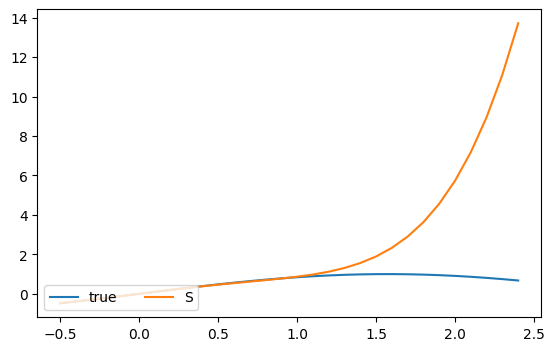

In [21]:
xs = np.arange(-0.5, 2.5, 0.1)
example_plot(xs, math.sin, p)

**！在端点处发生了意外**
来尝试一下别的参数

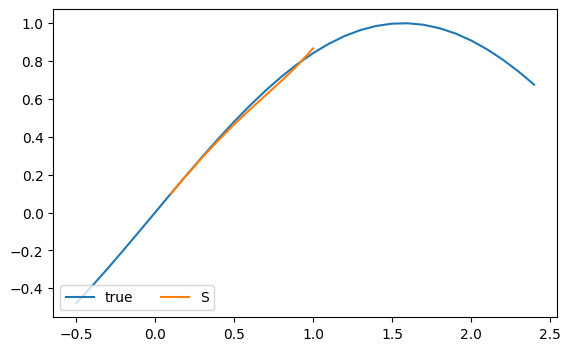

In [22]:
p2 = PPoly(c, x, False)
example_plot(xs, math.sin, p2)

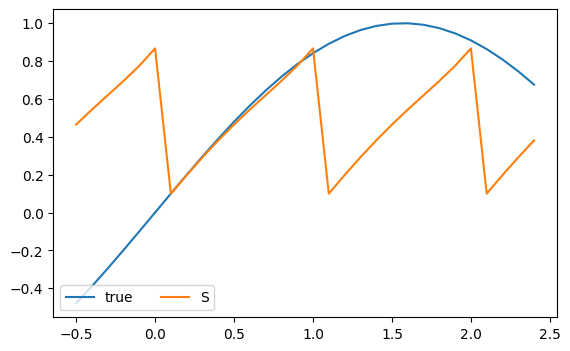

In [23]:
p2 = PPoly(c, x, 'periodic')
example_plot(xs, math.sin, p2)